# **A Simple Application of the Numerov Method in Python to Solve the 1D Schrödinger Equation** 


The one-dimensional time-independent Schrödinger equation is given by

$$-\frac{\hbar^2}{2m}\frac{\partial^2 \psi}{\partial x^2} + V(x)\psi(x) = E\psi$$

and is a second-order linear differential equation in $\psi$. We can also rewrite it in the form

$$\frac{\partial^2 \psi}{\partial x^2} = - k\psi$$

where 

$$k = \frac{2m\left(E - V(x)\right)}{\hbar^2}$$

Note that this differs from the usual definition of $k$ by a square root. We will use the Numerov method to numerically solve for $\psi$ and the `fsolve` function from `scipy` to iteratively solve for the eigenvalues, which corresponds to the allowed energies.  


## **The Numerov Method**

The value of a function $u(x)$ subject to a small deviation $h$ can be expressed in terms of a Taylor series  

$$u(x + h) = u(x) + u'(x)h + \frac{1}{2}u''(x)h^2 + \frac{1}{6}u'''(x)h^3 + \frac{1}{24}u''''(x)h^4 + O(h^5)$$

We can also write

$$u(x - h) = u(x) - u'(x)h + \frac{1}{2}u''(x)h^2 - \frac{1}{6}u'''(x)h^3 + \frac{1}{24}u''''(x)h^4 - O(h^5)$$

If we add the above two series together, we get

$$u(x + h) + u(x - h) = 2u(x) + u''(x)h^2  + \frac{1}{12}u''''(x)h^4 + O(h^6)$$

Note that the Schrödinger equation is in the form 

$$u''(x) = -g(x)u(x) \equiv z(x)$$

Substituting into the above, using the central difference approximation for $z''(x)$ and solving for $u(x + h)$, we get

$$\begin{aligned} u(x + h)  &= 2u(x) - u(x - h) - g(x)u(x)h^2  + \frac{1}{12}z''(x)h^4 + O(h^6) \\ \\ 
& = 2u(x) - u(x - h) - g(x)u(x)h^2  + \frac{1}{12}\left[\frac{z(x + h) + z(x - h) - 2z(x)}{h^2}\right]h^4 + O(h^6) \\ \\ 
& = 2u(x) - u(x - h) - g(x)u(x)h^2  + \frac{1}{12}\left[z(x + h) + z(x - h) - 2z(x)\right]h^2 + O(h^6) \\ \\ 
& = 2u(x) - u(x - h) - g(x)u(x)h^2 + \frac{1}{12}\left[-g(x + h)u(x + h) - g(x - h)u(x - h) + 2g(x)u(x)\right]h^2 + O(h^6) \\ \\ 
& = \frac{\left[2 - g(x)h^2 + \frac{1}{6}g(x)h^2\right]u(x) - \left[1 + \frac{1}{12}g(x - h)h^2\right]u(x - h)}{1 + \frac{1}{12}g(x + h)h^2} + O(h^6)\\ \\ 
& = \frac{2\left[1 - \frac{5}{12}g(x)h^2\right]u(x) - \left[1 + \frac{1}{12}g(x - h)h^2\right]u(x - h)}{1 + \frac{1}{12}g(x + h)h^2} + O(h^6)
\end{aligned}$$

Expressing in terms of $\psi$ and $k$, and omitting terms of sixth order and above, we obtain the Numerov algorithm. 

$$ \psi(x + h) = \frac{2\left[1 - \frac{5}{12}k(x)h^2\right]\psi(x) - \left[1 + \frac{1}{12}k(x - h)h^2\right]\psi(x - h)}{1 + \frac{1}{12}k(x + h)h^2}$$

Conveniently for numerical methods, we can also write the above in the form

$$ \boxed{\psi_{i + 1} = \frac{2\left(1 - \frac{5}{12}k_ih^2\right)\psi_i - \left(1 + \frac{1}{12}k_{i - 1}h^2\right)\psi_{i - 1}}{1 + \frac{1}{12}k_{i + 1}h^2}}$$

and 

$$ \boxed{\psi_{i - 1} = \frac{2\left(1 - \frac{5}{12}k_ih^2\right)\psi_i - \left(1 + \frac{1}{12}k_{i + 1}h^2\right)\psi_{i + 1}}{1 + \frac{1}{12}k_{i - 1}h^2}}$$

These are the algorithms that we will use to numerically solve the Schrödinger equation.  


## **Solving the Schrödinger Equation**

Our strategy for solving the Schrödinger equation will look something like this:
1. Guess two initial values. 

2. Integrate using the Numerov algorithm up to a designated point. 

3. Repeat steps 1 and 2, integrating from the right. 

4. Apply boundary conditions to match the two solutions. 

5. Solve for the eigenvalues and plot the associated eigenfunctions. 

I'm now going to give the potential $V(x)$, for which we are going to solve the allowed wavefunctions and energies. Here it is
$$V(x) = \frac{\hbar^2}{2m}\alpha^2\lambda(\lambda - 1)\left[\frac{1}{2} - \frac{1}{\cosh^2(\alpha x)}\right]$$
For the sake of simplicity, let's set all of the constants to 1 except $l$, which we will set to 4. 
$$V(x) = 12\left[\frac{1}{2} - \frac{1}{\cosh^2(x)}\right]$$

Our potential looks like this:

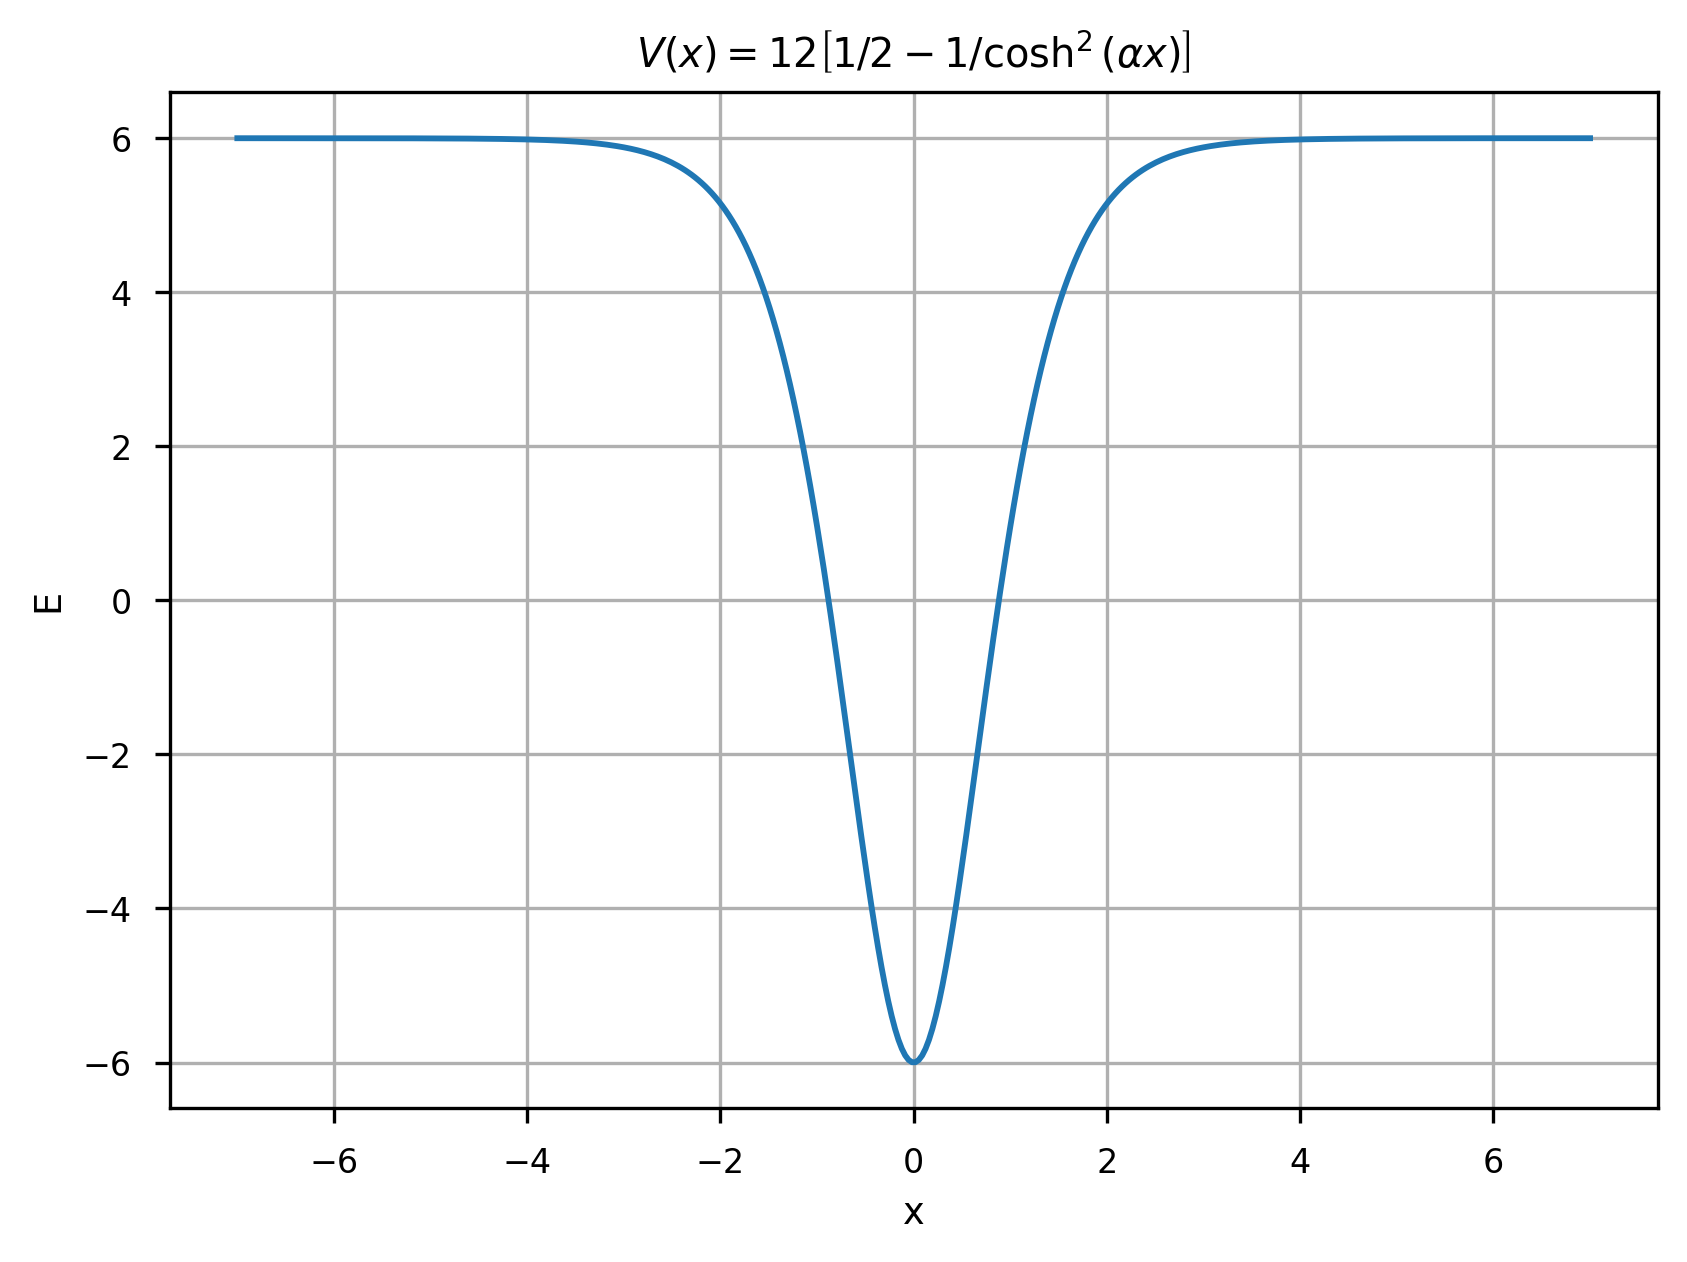

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

x_potential = np.linspace(-7, 7, 400) #x-axis

def V(x): #potential 
    return 12*(1/2 - 1/np.cosh(x)**2)

plt.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-v0_8-paper')
plt.plot(x_potential, V(x_potential))
plt.xlabel('x')
plt.ylabel('E')
plt.title('$V(x) = 12\left[1/2 - 1/\cosh^2(\\alpha x)\\right]$')
plt.grid()

And the analytical solution for the bound-state energies is given by

$$E_n = \frac{\hbar^2}{2m}\alpha^2\left[\frac{\lambda(\lambda - 1)}{2} - (\lambda - 1 - n)^2\right]$$

or, in our case

$$E_n = 6 - (3 - n)^2$$

where $n = 0, 1, 2, ...$ and represents the $n$-th state. 

Let's now define the Numerov algorithm and other necessary parameters. We'll start by defining the boundaries, initial values for our algorithm, and number of steps. 

In [89]:
a, c = -50, 50  #left & right boundaries
u0, u1 = 0, 1e-20  #left initial values
v0, v1 = 0, 1e-20  #right initial values
N = 10000  #number of steps

We'll then define $k$, but also the turning point $r$ and the step size $h$, all of which will depend on the energy $E$.  

In [90]:
def k(x, E):  #k in Schrödinger equation
    return E - V(x)  

def r(E):  #solves and returns the turning point for a given E value
    return abs(fsolve(k, -2.5, args = (E))[0])

def h(E):  #gives the step size by dividing the interval between the boundary and turning point into N intervals
    return (r(E)-a)/(N-1)

def square(u):  #squares & normalises the wavefunctions 
    return np.array(u)**2/np.linalg.norm(np.array(u)**2)

Finally, we'll define our Numerov algorithms, one integrating from the left and the other from the right. 

In [91]:
def numerov(a, u0, u1, E):  #integrates using Numerov algorithm from the left
    H = h(E)  #step size
    x = np.linspace(a, r(E), N)  #x values
    K = k(x, E)  #k values
    u = [u0, u1]  #u values
    for i in range(N-2):  #iterate Numerov N-2 times to get same length as x values array 
        u2 = (2*u1*(1 - 5*K[i+1]*(H**2)/12) - u0*(1 + K[i]*(H**2)/12))/(1 + K[i+2]*(H**2)/12)
        u0, u1 = u1, u2
        u.append(u2)
    return x, u

def onumerov(c, v0, v1, E):  #integrates using Numerov algorithm from the left
    H = h(E)
    y = np.linspace(c, -r(E) - 2*H, N+2)  #more values than left Numerov to use for boundary condition later
    K = k(y, E)
    v = [v0, v1]
    for i in range(N):
        v2 = (2*v1*(1 - 5*K[i+1]*(H**2)/12) - v0*(1 + K[i]*(H**2)/12))/(1 + K[i+2]*(H**2)/12)
        v0, v1 = v1, v2
        v.append(v2)
    return y, v

Let's try integrating from both sides. We guess an arbitrary value for the energy: $E = 4$, for example. The code below will integrate and plot the normalised probability densities $|\psi|^2$ associated with the wavefunctions. 

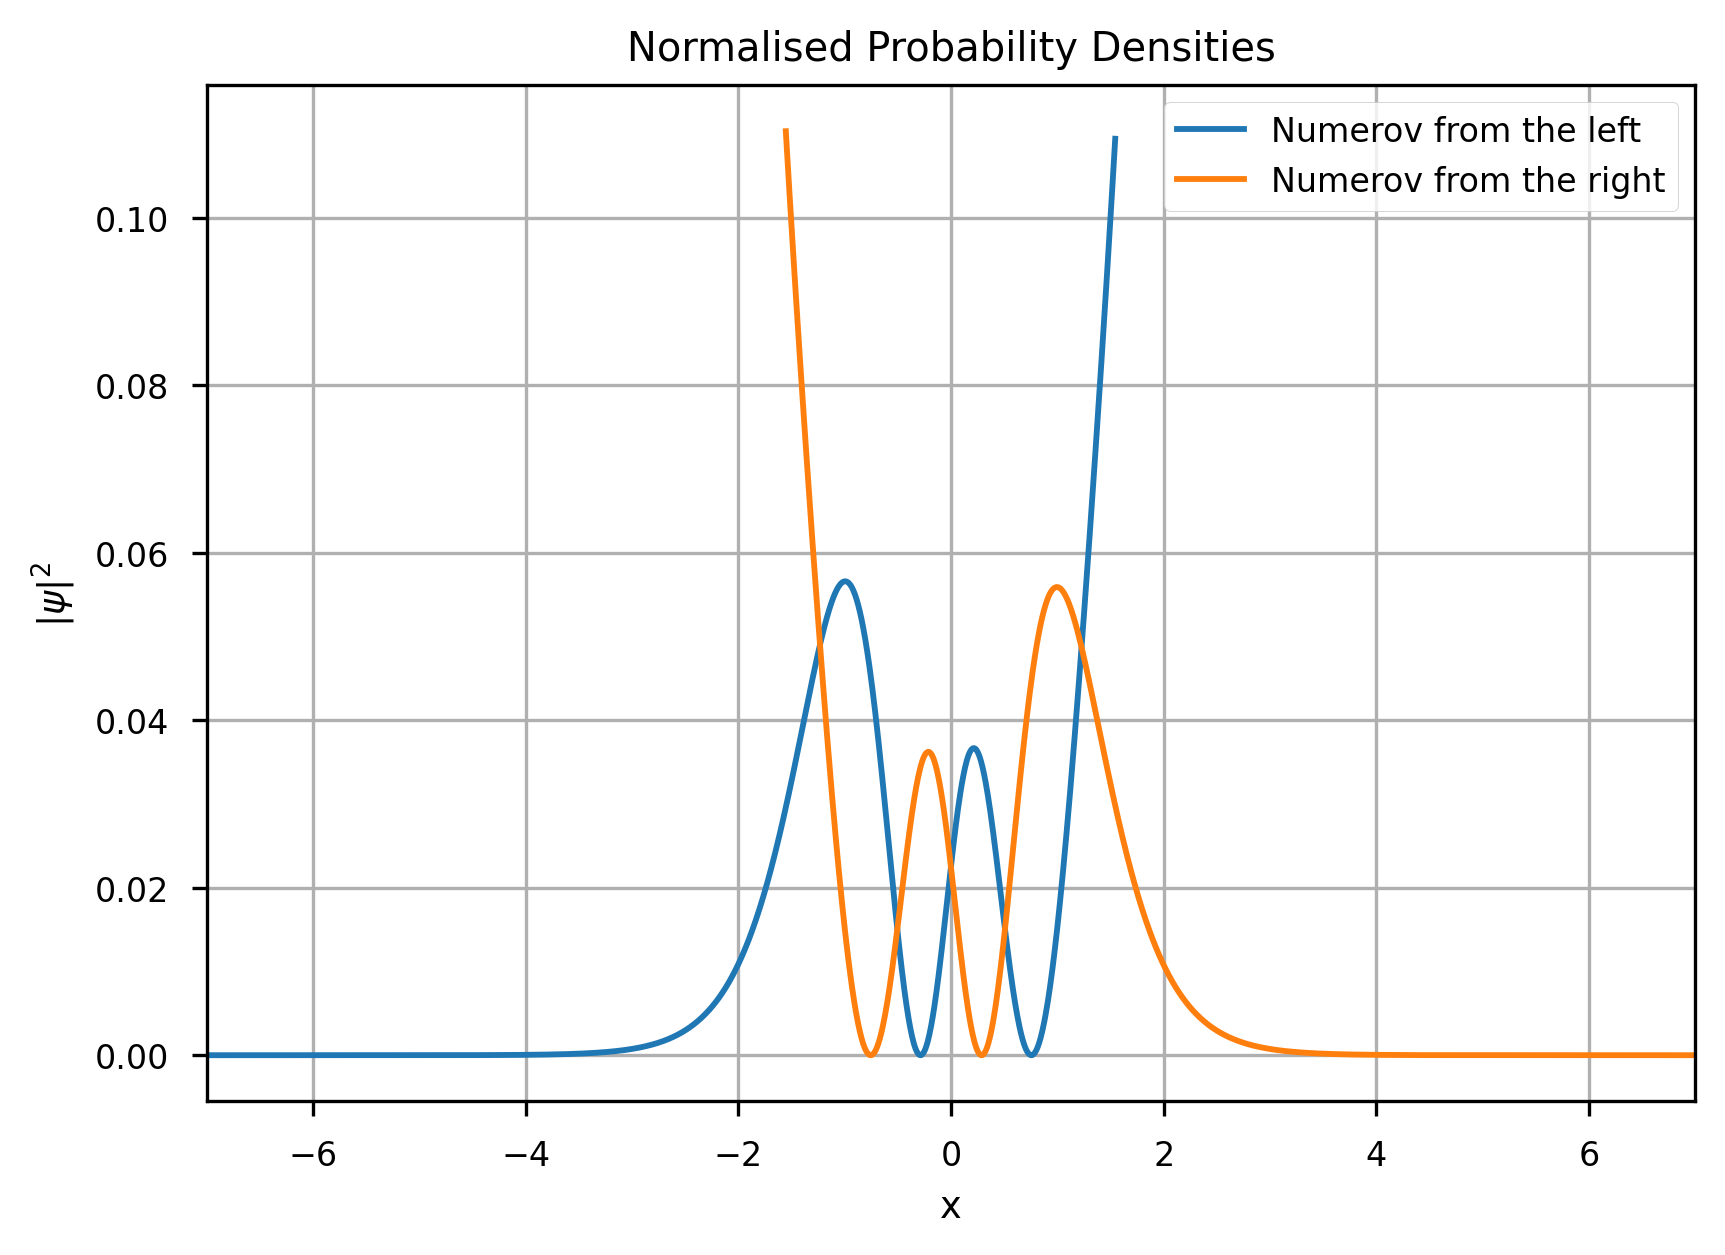

In [92]:
E = 4  #guess for the energy
x, u = numerov(a, u0, u1, E)  #left numerov
y, v = onumerov(c, v0, v1, E)  #right numerov

plt.plot(x, square(u), label = "Numerov from the left")
plt.plot(y, square(v), label = "Numerov from the right")
plt.title('Normalised Probability Densities')
plt.xlabel('x')
plt.ylabel('$|\psi|^2$')
plt.xlim(-7, 7)
plt.legend()
plt.grid()

The left and right wavefunctions don't seem to match. Intuitively, we would expect the integration from the left and right to yield a single solution for the given energies. The fact that the wavefunctions do not match up tells us that the energy value we chose was not an eigenvalue, and hence does not yield a solution to the Schrödinger equation. 

Let's try another value for the energy, say $E = 5$. 

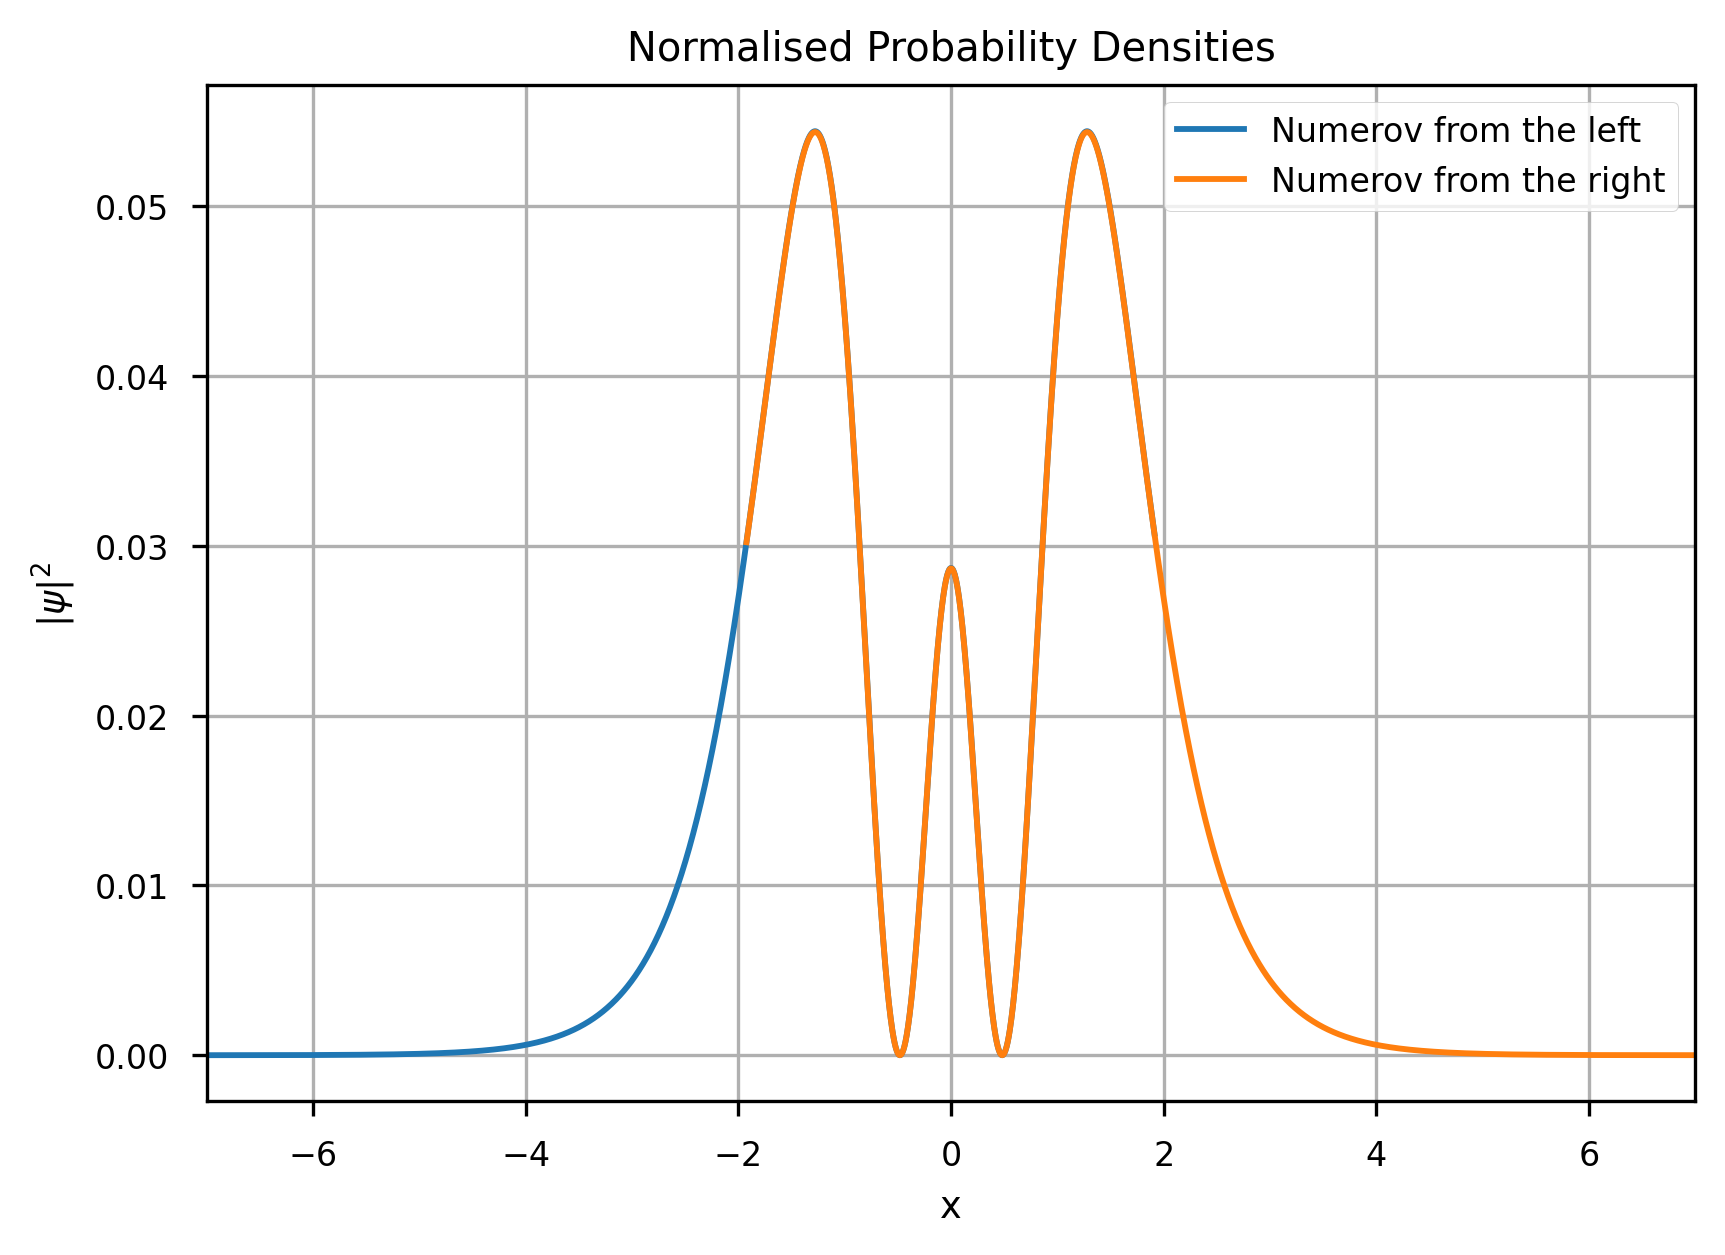

In [93]:
E = 5
x, u = numerov(a, u0, u1, E)
y, v = onumerov(c, v0, v1, E)

plt.plot(x, square(u), label = "Numerov from the left")
plt.plot(y, square(v), label = "Numerov from the right")
plt.title('Normalised Probability Densities')
plt.xlabel('x')
plt.ylabel('$|\psi|^2$')
plt.xlim(-7, 7)
plt.legend()
plt.grid()

Aha! The wavefunctions match up perfectly. This tell us with some confidence that the value we chose for the energy, or one close to it, corresponds to an eigenvalue and hence a valid solution to the Schrödinger equation. We could keep guessing for the correct energies all day, but we need a way to (1) state clearly as a condition what we mean when we say the wavefunctions "match", and (2) systematically search for the eigenvalues without manual guessing. 

For (1), we will return to theory. The boundary conditions we enforce when solving the time-independent Schrödinger equation analytically are that the wavefunction and its derivative should be equal on both sides of a given boundary of choice. For analytical solutions, this means the boundary between solutions for different regions defined by the potential, but in our case, any point can be chosen as a "boundary". We will choose where $E = V(x)$ to be the boundary (which we called $r$), but one could also choose the point $x = 0$, for example. 

Our combined conditions can be expressed as 

$$\frac{\psi'(x)}{\psi(x)} = \frac{\phi'(x)}{\phi(x)}$$

where $\psi(x)$ denotes the wavefunction from the left of the boundary and $\phi(x)$ from the right. Using the central difference approximation for the first derivative, we can write

$$\frac{\psi_{i+1} - \psi_{i-1}}{\psi_i} = \frac{\phi_{i+1} - \phi_{i-1}}{\phi_i}$$

$$f(E) = \frac{\psi_{i+1} - \psi_{i-1}}{\psi_i} - \frac{\phi_{i+1} - \phi_{i-1}}{\phi_i} = 0$$

and the task of enforcing the boundary conditions becomes a root-finding problem, which we can easily solve using `fsolve`. We can define a function for the above that we can throw into `fsolve` later 

In [94]:
def boundary(E): 
    R, H = r(E), h(E)  #r and step size for a given E
    u = numerov(a, u0, u1, E)[1]  #numerov from left
    v = onumerov(c, v0, v1, E)[1]  #numerov from right
    q = round((-R-a)/H)  #index corresponding to r for the left wavefunction
    p = -3 #index corresponding to r for right wavefunction 
    return (u[q + 1] - u[q - 1])/u[q] - (v[p - 1] - v[p + 1])/v[p]  #returns f

Now for (2), we need some way to systematically search for the eigenvalues. For bound-state solutions of the Schrödinger equation, the possible energies are restricted to be within the maximum and minimum value of the potential. We define

In [95]:
min, max = int(np.min(V(x))), int(np.max(V(x)))

To search between these values, we'll create a for loop that runs fsolve over the range between these values. However, note that for some values, `fsolve` will converge onto the same eigenvalue and so we'll have to exclude repeats. 

In [96]:
E_vals = []  #eigenvalues
check = -10  #arbitrary value lower than minimum
for i in range(min, max, 1):  #search for eigenvalue within range
    E_new = fsolve(boundary, i, xtol = 1e-2)[0]
    if E_new - check >= 0.3:  #add new eigenvalue if difference with last eigenvalue larger than 0.3
        E_vals.append(round(E_new))  #for this problem, eigenvalues are integers
        check = E_new

print(f'Eigenvalues: {E_vals}')

Eigenvalues: [-3, 2, 5]


We have our eigenvalues! The reader can verify that these values correspond to those calculated using the analytical expression for the $n$-th energy. Now, let's plot the probability densities of the states associated with these values for the energy. 

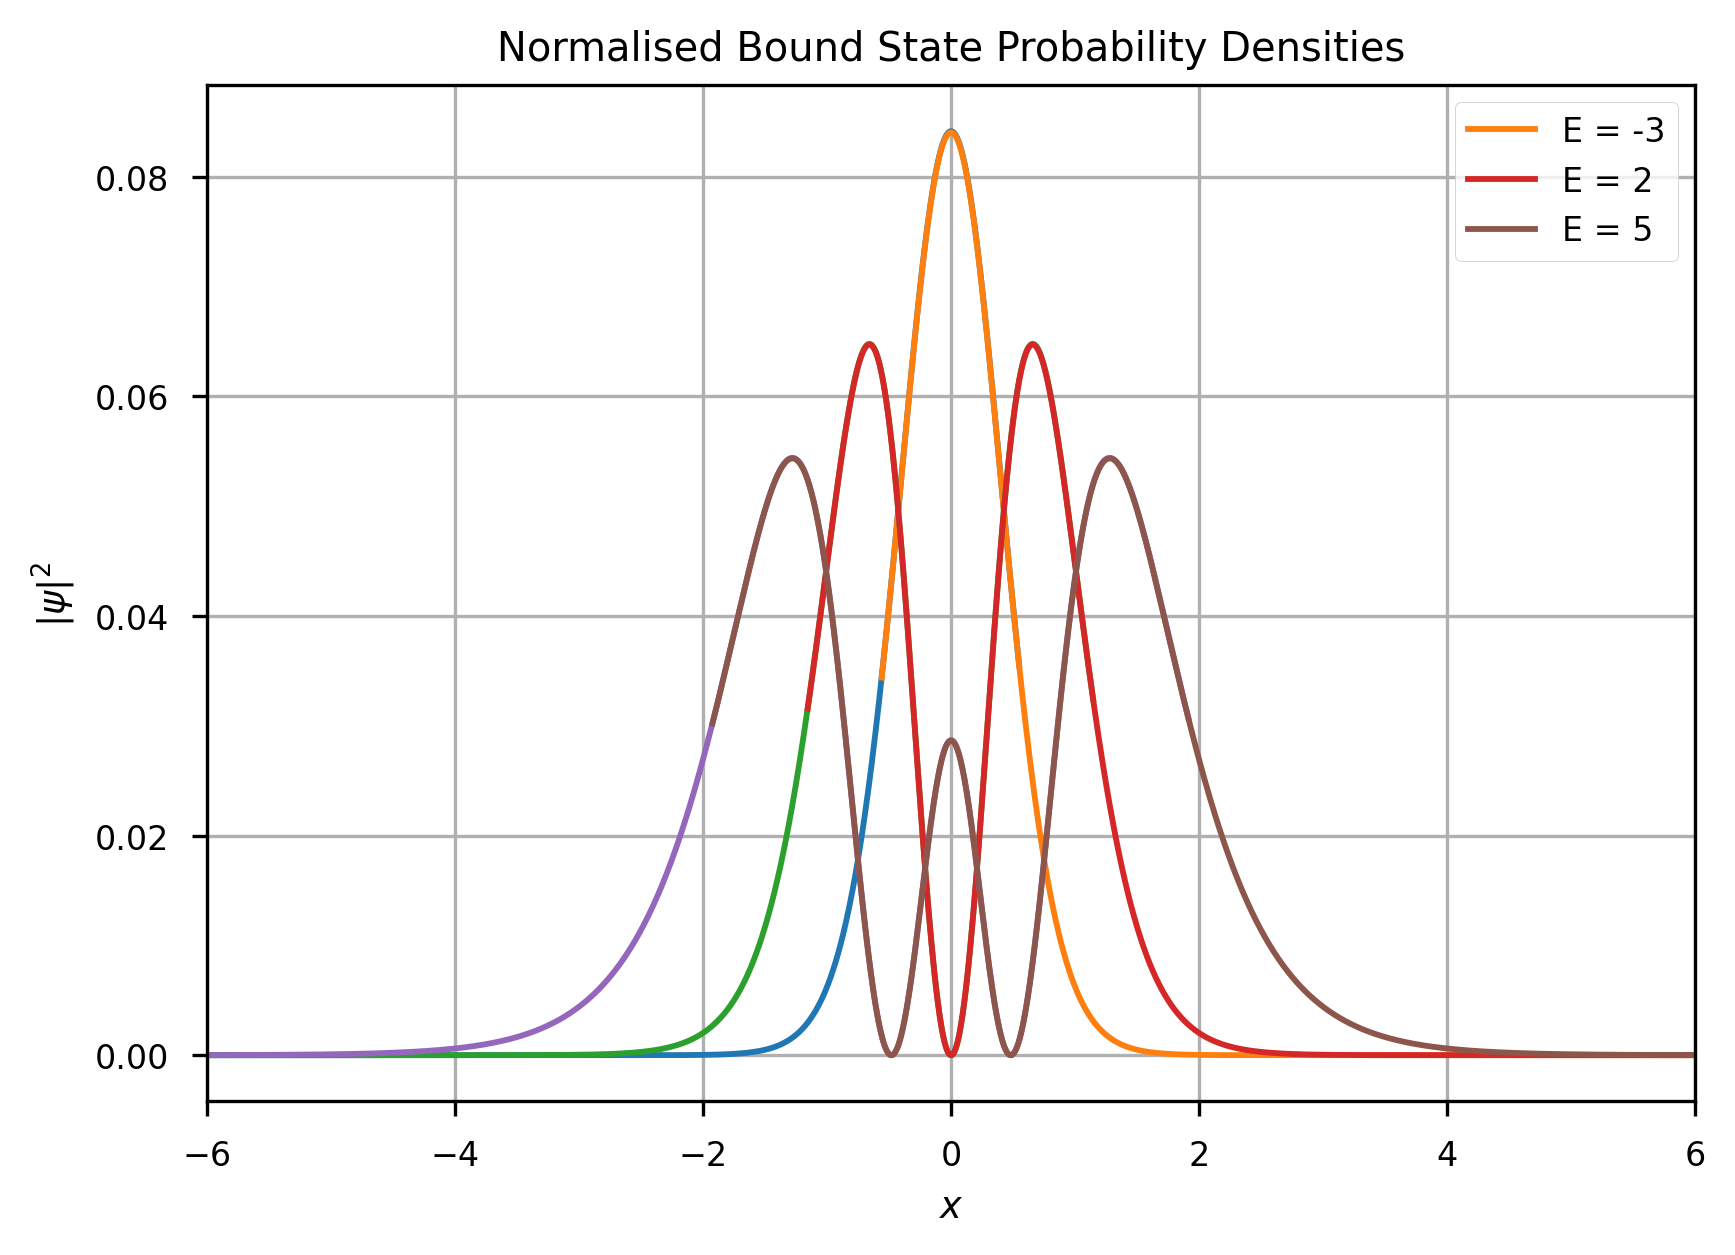

In [97]:
for i in range(len(E_vals)):  #plot for each eigenvalue
    x, u = numerov(a, u0, u1, E_vals[i])
    y, v = onumerov(c, v0, v1, E_vals[i])
    plt.plot(x, square(u))
    plt.plot(y, square(v), label = f'E = {E_vals[i]}')
plt.xlabel('$x$')
plt.ylabel('$|\psi|^2$')
plt.title('Normalised Bound State Probability Densities')
plt.xlim(-6, 6)
plt.legend()
plt.grid()

## **Summary**

#### Numerov Algorithm for a Symmetric Potential

$$V(x) = \frac{\hbar^2}{2m}\alpha^2\lambda(\lambda - 1)\left[\frac{1}{2} - \frac{1}{\cosh^2(\alpha x)}\right]$$

Put together, the code is as follows. The physical constants have also been defined. 

Eigenvalues: [-1.5, 1.0, 2.5]
Runtime: 1.87 s


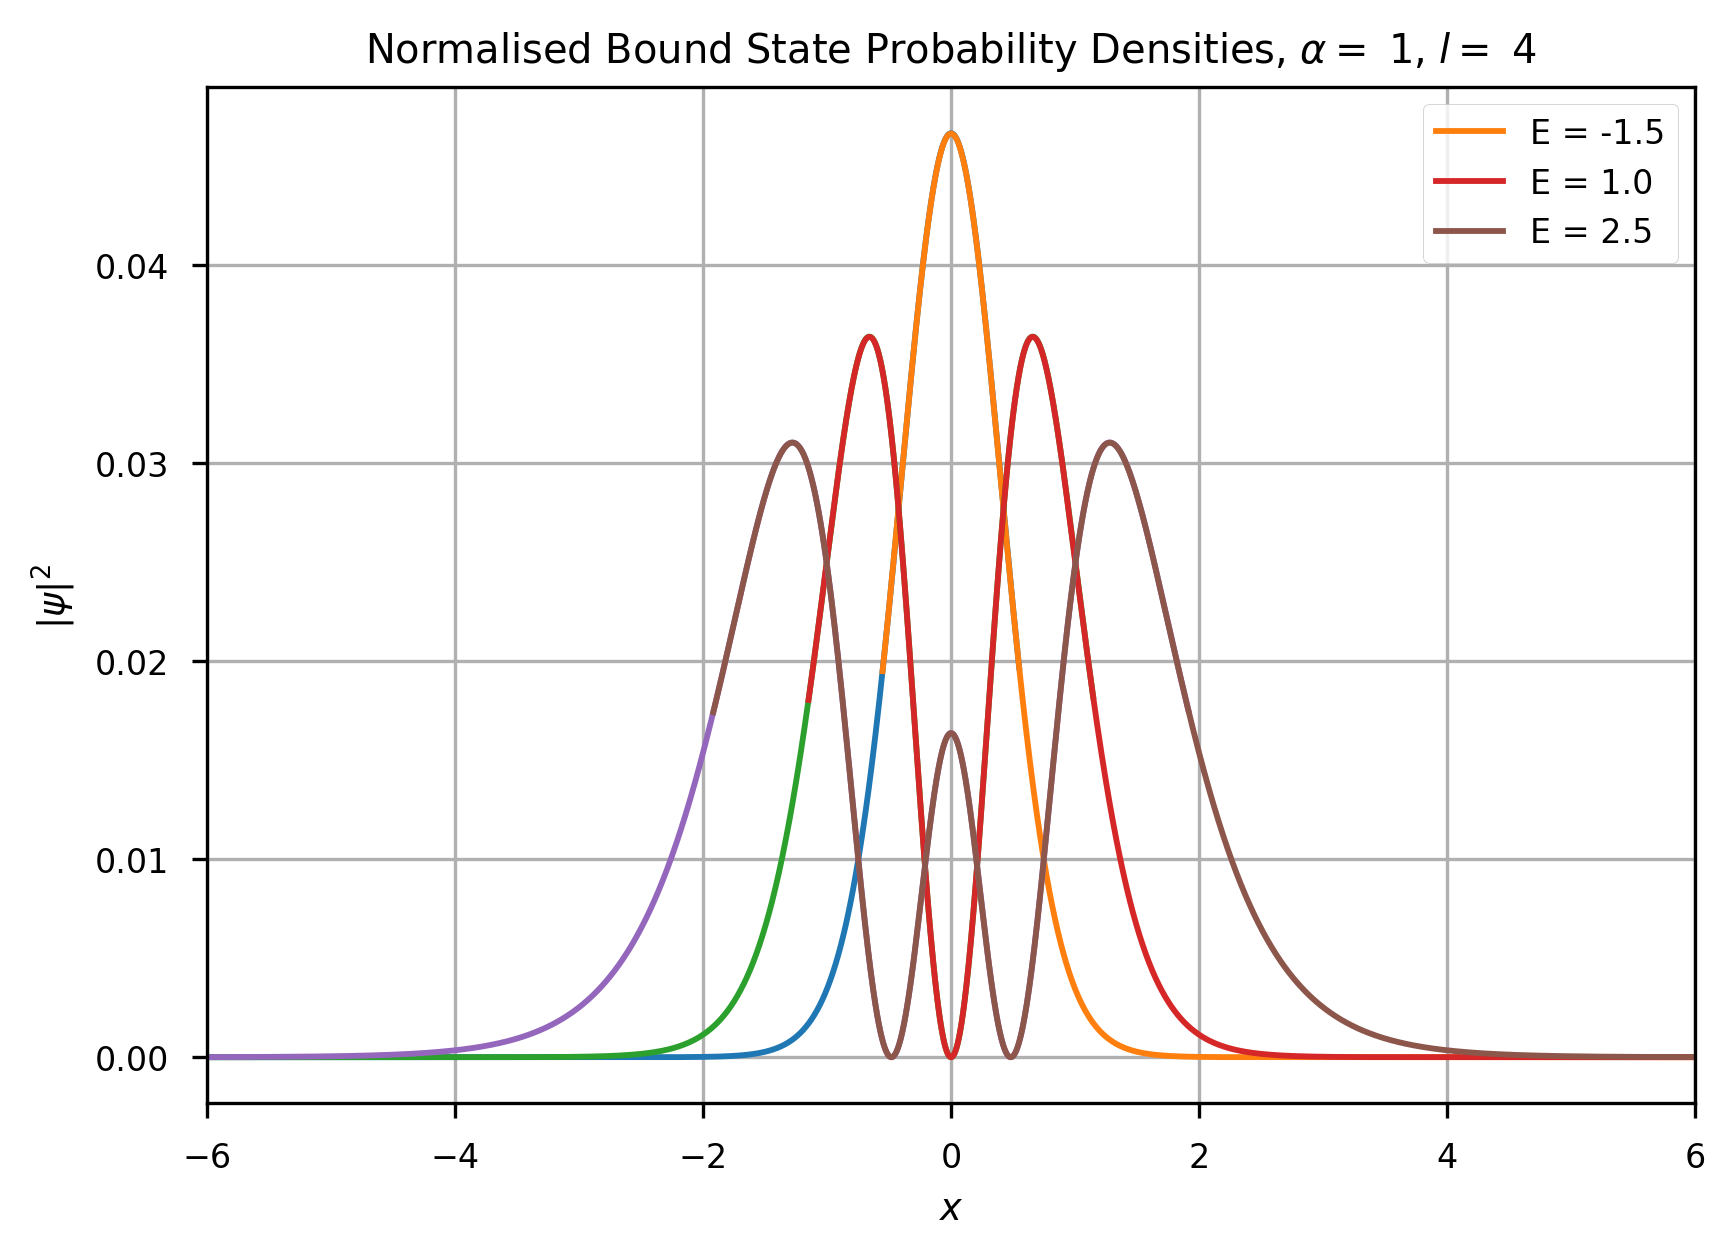

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import random 
import time 

start = time.time()

a, c = -15, 15  # Left and right boundaries
u0, u1 = 0, 1e-20  # Initial boundary values (left)
v0, v1 = 0, 1e-20  # Initial boundary values (right)
N = 10000  # Number of steps
x = np.linspace(-15, 15, 1000)
alpha, l, g = 1, 4, 1/2  # The parameter g corresponds to hbar^2/2m

def V(x):  # Define potential
    return g * alpha**2 * l*(l-1) * (1/2 - 1/np.cosh(alpha * x)**2)

def k(x, E):  # Define k 
    return 1/g * (E - V(x))

def r(E):  # Solve for r (classical turning point)
    return abs(fsolve(k, -2.5, args = (E))[0])

def h(E):  # Step size
    return (r(E)-a)/(N-1)

def numerov(a, u0, u1, E):  # Numerov algorithm from the left
    H = h(E)  # Compute step size for given E
    x = np.linspace(a, r(E), N)  # Compute x values from a to r in N steps
    K = k(x, E)  # Compute hbar^2[V(x) - E]/2m for given E
    u = [u0, u1]  # Initialise wavefunction values for integration
    for i in range(N-2):  # Integrate using Numerov
        u2 = (2*u1*(1 - 5*K[i+1]*(H**2)/12) - u0*(1 + K[i]*(H**2)/12))/(1 + K[i+2]*(H**2)/12)
        u0, u1 = u1, u2
        u.append(u2)
    return x, u  # Return x and wavefunction values

def onumerov(c, v0, v1, E):  # Numerov algorithm from the right
    H = h(E)
    y = np.linspace(c, -r(E) - 2*H, N+2)
    K = k(y, E)
    v = [v0, v1]
    for i in range(N):
        v2 = (2*v1*(1 - 5*K[i+1]*(H**2)/12) - v0*(1 + K[i]*(H**2)/12))/(1 + K[i+2]*(H**2)/12)
        v0, v1 = v1, v2
        v.append(v2)
    return y, v

def boundary(E):  # Enforce boundary condition at r
    R, H = r(E), h(E)  # Compute r and step size
    u = numerov(a, u0, u1, E)[1]  # Compute left wavefunction for given E
    v = onumerov(c, v0, v1, E)[1]  # Compute right wavefunction for given E
    q = round((-R-a)/H)  # Calculate approximate index of left wavefunction at r
    p = -3  # Index of right wavefunction at r
    return (u[q + 1] - u[q - 1])/u[q] - (v[p - 1] - v[p + 1])/v[p] # Return f; boundary condition f = 0

def square(u):  # Square & normalise wavefunctions 
    return np.array(u)**2/np.linalg.norm(np.array(u)**2)

min, max = int(np.min(V(x))), round(np.max(V(x)))  # Find the min and max of the potential

E_vals = []  # Final eigenvalues/energies
check = random.randint(-100, min)  # Initialise with number less than min
for i in range(min, max, 1):  # Search for eigenvalues between min and max
    E_new = fsolve(boundary, i)[0]
    if E_new - check >= 0.3 and round(E_new) < max:  # Exclude repeated eigenvalues
        E_vals.append(round(E_new, 1))
        check = E_new  

print(f'Eigenvalues: {E_vals}')

plt.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-v0_8-paper')
for i in range(len(E_vals)):  # Plots normalised probability density for each eigenvalue in E_vals 
    x, u = numerov(a, u0, u1, E_vals[i])
    y, v = onumerov(c, v0, v1, E_vals[i])
    plt.plot(x, square(u))
    plt.plot(y, square(v), label = f'E = {E_vals[i]}')
plt.xlabel('$x$')
plt.ylabel('$|\psi|^2$')
plt.title(f'Normalised Bound State Probability Densities, $\\alpha =$ {alpha}, $l =$ {l}')
plt.xlim(-6, 6)
plt.grid()
plt.legend()

end = time.time()
print(f'Runtime: {round(end - start, 2)} s')